# Data_Analysis_States

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install mlxtend

In [4]:
data=pd.read_csv("C:/Users/hp/Downloads/Final_Data_For_Analysis.csv")

In [5]:
States= data['States/UTs'].unique().tolist()
len(States)

37

In [6]:
display(data.head())

,S.No.,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector,Total number of hospitals (public + private),Number of hospitals beds in public sector,Number of hospitals in beds private sector,Total number of hospitals beds (public + private),Number of ICU beds in public sector,Number of ICU beds in private sector,...,Number of ventilators in public sector,Number of ventilators in private sector,Total number of Ventilators (public + private),Confirmed Cases,Deceased,Tested (Cr.),Vaccinated (At least one dose) (Cr.),Fully Vaccinated (Cr.),Vaccine Doses Administered (Cr.),Population (Cr.)
0,1,Andaman Nicobar Island,30.0,6.0,36,1075.0,219,1294,54.0,11.0,...,27.0,5.0,32,7651.0,129.0,6L,2.9L,2L,4.9L,4L
1,2,Andhra Pradesh,258.0,670.0,928,23138.0,60092,83230,1157.0,3005.0,...,578.0,1502.0,2080,2066450.0,14373.0,3,3.3,2,5.3,5.2
2,3,Arunachal Pradesh,218.0,20.0,238,2404.0,220,2624,120.0,11.0,...,60.0,6.0,66,55155.0,280.0,11.9L,7.7L,5.3L,13.1L,15L
3,4,Assam,1226.0,503.0,1729,17142.0,7036,24178,857.0,352.0,...,429.0,176.0,605,610645.0,5997.0,2.5,2,80.7L,2.8,3.4
4,5,Bihar,1147.0,1887.0,3034,11664.0,19193,30857,583.0,960.0,...,292.0,480.0,772,726098.0,9661.0,5.1,5,1.8,6.8,12


In [7]:
data= data.rename(columns={'state/UTs':'state_Uts',"Total number of hospitals (public + private)":"total no. of hptls public and private",
                        "Total number of hospitals beds (public + private)":'total no.of hptls beds public and private',
                        'Total number of Ventilators (public + private)':'total no. of Ventilators in public and private','Tested (Cr.)':'tested in crore',
                        'Vaccinated (At least one dose) (Cr.)':"Vaccinated At least one dose in cr.","Fully Vaccinated (Cr.)":'Fully Vaccinated in Cr.',
                        "Vaccine Doses Administered (Cr.)":"Vaccine Doses Administered in Cr.","Population (Cr.)":"Population Cr."})
data.head(2)

,S.No.,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector,Total number of hospitals (public + private),Number of hospitals beds in public sector,Number of hospitals in beds private sector,Total number of hospitals beds (public + private),Number of ICU beds in public sector,Number of ICU beds in private sector,...,Number of ventilators in public sector,Number of ventilators in private sector,Total number of Ventilators (public + private),Confirmed Cases,Deceased,tested in crore,Vaccinated At least one dose in cr.,Fully Vaccinated in Cr.,Vaccine Doses Administered in Cr.,Population (Cr.)
0,1,Andaman Nicobar Island,30.0,6.0,36,1075.0,219,1294,54.0,11.0,...,27.0,5.0,32,7651.0,129.0,6L,2.9L,2L,4.9L,4L
1,2,Andhra Pradesh,258.0,670.0,928,23138.0,60092,83230,1157.0,3005.0,...,578.0,1502.0,2080,2066450.0,14373.0,3,3.3,2,5.3,5.2


In [8]:
data.dtypes

S.No.                                                   int64
States/UTs                                             object
Number of hospitals in public sector                  float64
Number of hospitals in private sector                 float64
Total number of hospitals (public + private)           object
Number of hospitals beds in public sector             float64
Number of hospitals in beds private sector             object
Total number of hospitals beds (public + private)      object
Number of ICU beds in public sector                   float64
Number of ICU beds in private sector                  float64
Total number of ICU beds (public + private)            object
Number of ventilators in public sector                float64
Number of ventilators in private sector               float64
Total number of Ventilators (public + private)         object
Confirmed Cases                                       float64
Deceased                                              float64
tested i

In [9]:
data.mean()

S.No.                                            19.000000
Number of hospitals in public sector            716.055556
Number of hospitals in private sector          1207.944444
Number of hospitals beds in public sector     19832.944444
Number of ICU beds in public sector             991.666667
Number of ICU beds in private sector           1646.222222
Number of ventilators in public sector          495.833333
Number of ventilators in private sector         823.083333
Confirmed Cases                              952378.111111
Deceased                                      12735.277778
dtype: float64

In [10]:
d=data.isnull().any()

In [11]:
data.shape

(37, 21)

In [12]:
data=data.dropna()

In [13]:
data.describe().T.head(3)

,count,mean,std,min,25%,50%,75%,max
S.No.,34.0,19.617647,10.987637,1.0,11.25,20.5,28.75,37.0
Number of hospitals in public sector,34.0,757.676471,1012.093172,9.0,94.75,449.0,1076.00,4635.0
Number of hospitals in private sector,34.0,1278.205882,2489.020652,4.0,15.50,504.5,1415.50,12468.0


In [14]:
data.corr().head(1)

,S.No.,Number of hospitals in public sector,Number of hospitals in private sector,Number of hospitals beds in public sector,Number of ICU beds in public sector,Number of ICU beds in private sector,Number of ventilators in public sector,Number of ventilators in private sector,Confirmed Cases,Deceased
S.No.,1.0,0.313512,0.261959,0.354505,0.35448,0.227299,0.354539,0.2273,0.054477,0.079666


In [15]:
data.reset_index(inplace=True)

Text(0, 0.5, 'Number of hospitals in private sector')

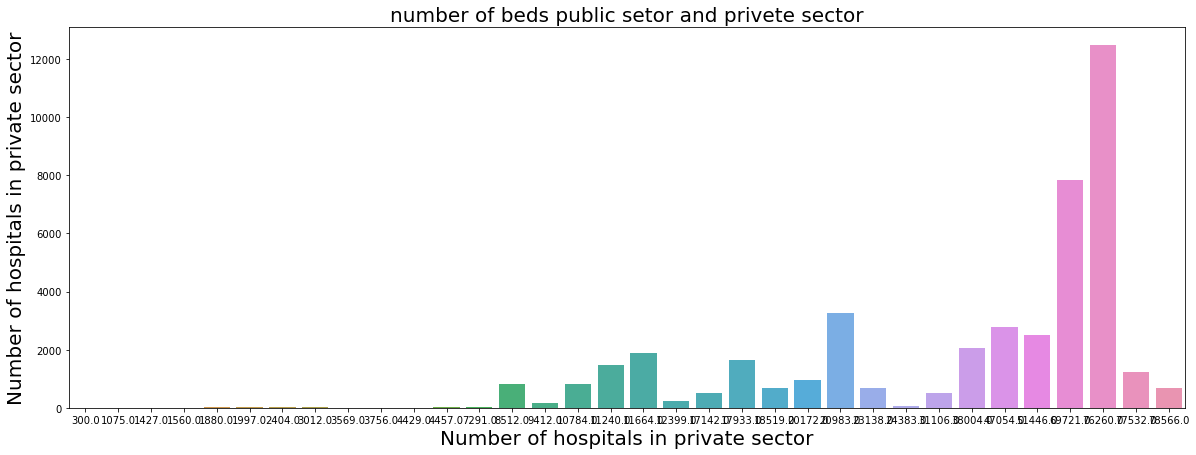

In [16]:
plt.figure(figsize=(20,7))
sns.barplot(x=data["Number of hospitals beds in public sector"],y = data["Number of hospitals in private sector"])
plt.title("number of beds public setor and privete sector",fontsize =20)
plt.xlabel("Number of hospitals in private sector",fontsize=20)
plt.ylabel("Number of hospitals in private sector",fontsize=20)

<AxesSubplot:xlabel='States/UTs', ylabel='Confirmed Cases'>

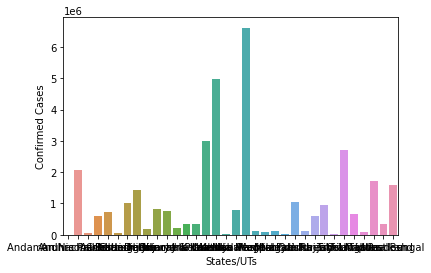

In [17]:
sns.barplot(x="States/UTs", y="Confirmed Cases", data=data)

In [18]:
data.head()

,index,S.No.,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector,Total number of hospitals (public + private),Number of hospitals beds in public sector,Number of hospitals in beds private sector,Total number of hospitals beds (public + private),Number of ICU beds in public sector,...,Number of ventilators in public sector,Number of ventilators in private sector,Total number of Ventilators (public + private),Confirmed Cases,Deceased,tested in crore,Vaccinated At least one dose in cr.,Fully Vaccinated in Cr.,Vaccine Doses Administered in Cr.,Population (Cr.)
0,0,1,Andaman Nicobar Island,30.0,6.0,36,1075.0,219,1294,54.0,...,27.0,5.0,32,7651.0,129.0,6L,2.9L,2L,4.9L,4L
1,1,2,Andhra Pradesh,258.0,670.0,928,23138.0,60092,83230,1157.0,...,578.0,1502.0,2080,2066450.0,14373.0,3,3.3,2,5.3,5.2
2,2,3,Arunachal Pradesh,218.0,20.0,238,2404.0,220,2624,120.0,...,60.0,6.0,66,55155.0,280.0,11.9L,7.7L,5.3L,13.1L,15L
3,3,4,Assam,1226.0,503.0,1729,17142.0,7036,24178,857.0,...,429.0,176.0,605,610645.0,5997.0,2.5,2,80.7L,2.8,3.4
4,4,5,Bihar,1147.0,1887.0,3034,11664.0,19193,30857,583.0,...,292.0,480.0,772,726098.0,9661.0,5.1,5,1.8,6.8,12


In [19]:
data.index

RangeIndex(start=0, stop=34, step=1)

Text(0.5, 1.0, 'Correlation ')

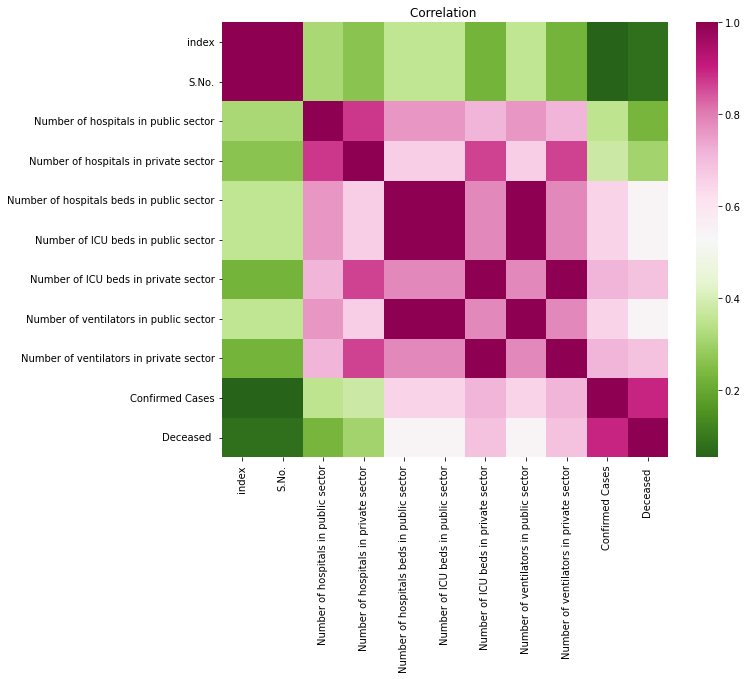

In [20]:
corr=data.corr()
fig = plt.figure(figsize=(10,8))
r = sns.heatmap(corr, cmap='PiYG_r')
r.set_title("Correlation ")

array([[<AxesSubplot:title={'center':'Confirmed Cases'}>]], dtype=object)

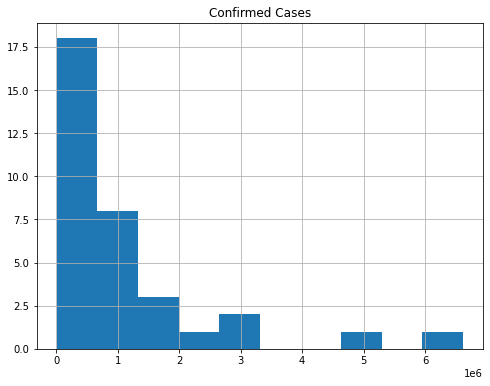

In [21]:
data.hist(column="Confirmed Cases",figsize=(8,6))

array([[<AxesSubplot:title={'center':'Number of ICU beds in public sector'}>]],
      dtype=object)

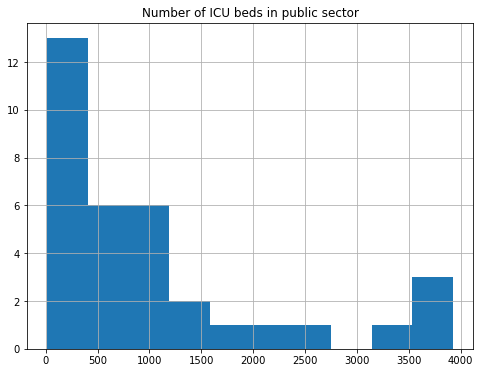

In [22]:
data.hist(column=["Number of ICU beds in public sector"],figsize=(8,6))

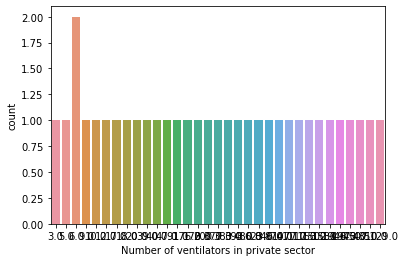

In [23]:
sns.countplot(data["Number of ventilators in private sector"])
plt.show()

<AxesSubplot:ylabel='Number of ventilators in public sector'>

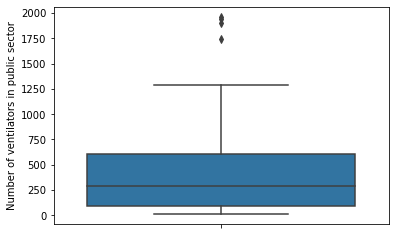

In [24]:
sns.boxplot(y=data["Number of ventilators in public sector"])

<AxesSubplot:ylabel='Number of ventilators in private sector'>

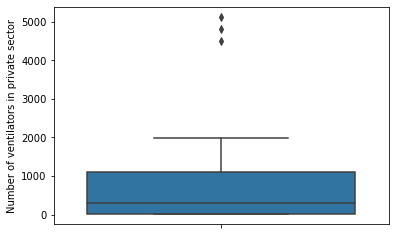

In [25]:
sns.boxplot(y=data['Number of ventilators in private sector'])

<AxesSubplot:ylabel='Number of ICU beds in public sector'>

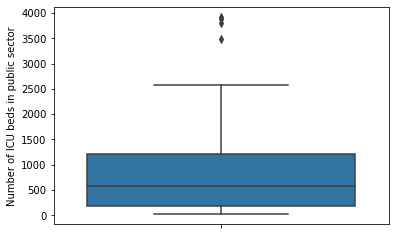

In [26]:
sns.boxplot(y=data['Number of ICU beds in public sector'])

<AxesSubplot:xlabel='Number of ICU beds in public sector', ylabel='count'>

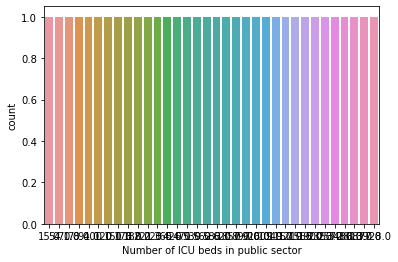

In [27]:
sns.countplot(data["Number of ICU beds in public sector"])


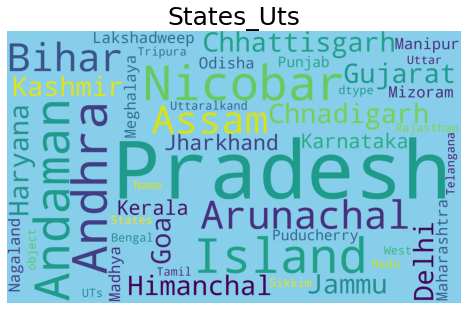

In [28]:
from wordcloud import WordCloud
plt.rcParams['figure.figsize'] = (12, 5)
wordcloud = WordCloud(background_color = "skyblue", width =2000,  height = 1200, max_words = 121).generate(str(data["States/UTs"]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("States_Uts",fontsize = 25)
plt.show()

In [55]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [56]:
data['state']=LabelEncoder().fit_transform(data["States/UTs"])


In [57]:
X = data["Number of hospitals in beds private sector"]
y = data['state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
vectorizer = CountVectorizer()

NB = MultinomialNB()
NB.fit(vectorizer.fit_transform(X_train), y_train)

X_test_vector = vectorizer.transform(X_test)
y_pred = NB.predict(X_test_vector)

In [59]:
from sklearn.metrics import confusion_matrix,classification_report

In [60]:
cm=np.array(confusion_matrix(y_test,y_pred))


In [61]:
cm

array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0]], dtype=int64)